In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math

class TSP():
    cities = 0
    distances = []
    locations = []
    
    def distance(self, c1, c2):
        loc1, loc2 = self.locations[c1], self.locations[c2]
        return math.sqrt((loc1[0]-loc2[0])**2 + (loc1[1]-loc2[1])**2)
    
    def __init__(self, cities, seed=1):
        random.seed(seed)
        self.cities = cities
        
        self.locations = []
        for i in range(cities):
            self.locations.append((random.random(), random.random()))
        
        self.distances = []
        for i in range(cities):
            self.distances.append([])
            for j in range(cities):
                self.distances[i].append(self.distance(i, j))
                
    def random_solution(self):
        s = [i for i in range(self.cities)]
        random.shuffle(s)
        return s
    
    def evaluate(self, s):
        fit = 0
        for i in range(len(s)):
            fit += self.distances[s[i]][s[i+1 if i+1<len(s) else 0]]
        return fit
    
    def mutate(self, s):
        sol = s[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c2 < c1:
            ctmp = c1
            c1 = c2
            c2 = ctmp
        rev = sol[c1:c2+1]
        rev.reverse()
        sol[c1:c2+1] = rev
        return sol
    
    def crossover(self, s1, s2):
        sol1, sol2 = s1[:], s2[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c2 < c1:
            ctmp = c1
            c1 = c2
            c2 = ctmp
        sol1[c1:c2+1] = list(filter(lambda x: x in sol1[c1:c2+1], s2))
        sol2[c1:c2+1] = list(filter(lambda x: x in sol2[c1:c2+1], s1))
        
        return sol1, sol2
    
    def display_solution_param(self, solution):
        fig, ax = plt.subplots(figsize=(8, 8))

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)
            
        plt.xlim((-0.03,1.03))
        plt.ylim((-0.03,1.03))
        plt.show()

**Task 1:** Implement the generational evolutionary algorithm with tournament selection. Let it be parametrized with four parameters: the size of the population $N$, the size of the tournament $t$, the probability of mutation $p_m$ and the probability of crossover $p_c$. The algorithm should terminate automatically after 50 generations with no improvement.

In [2]:
import numpy as np

def generate_starting_population(problem, n):
    return [problem.random_solution() for _ in range(n)]
    

def tournament(solutions, problem, t):
    solutions = np.array(solutions)
    tournament = solutions[np.random.choice(range(len(solutions)), t)]
    scores = [problem.evaluate(sol) for sol in tournament]
    return [list(s) for s in tournament[np.argsort(scores)[:2]]]
    
def construct_new_generation(problem, prev_generation, t, p_m, p_c):
    generation = []
    while len(generation) < len(prev_generation):
        if random.random() < p_c:
            sol1, sol2 = tournament(prev_generation, problem, t)
            sol1, sol2 = problem.crossover(sol1, sol2)
            for sol in (sol1, sol2):
                if random.random() < p_m:
                    sol = problem.mutate(sol)
                generation.append(sol)
        else:
            sol1, sol2 = tournament(prev_generation, problem, t)
            for sol in (sol1, sol2):
                if random.random() < p_m:
                    sol = problem.mutate(sol)
                generation.append(sol)
    return generation
        

def evolution(problem, n, t, p_m, p_c):
    no_new_sol_for = 0
    last_score = np.inf
    generation = generate_starting_population(problem, n)
    best_solution = []
    
    while no_new_sol_for < 50:
        generation = construct_new_generation(problem, generation, t, p_m, p_c)
        scores = [problem.evaluate(sol) for sol in generation]
        best_solution = generation[np.argmin(scores)]
        new_best = np.min(scores)
        if new_best < last_score:
            no_new_sol_for = 0
            last_score = new_best
        else:
            no_new_sol_for += 1
            
    return best_solution, problem.evaluate(best_solution)

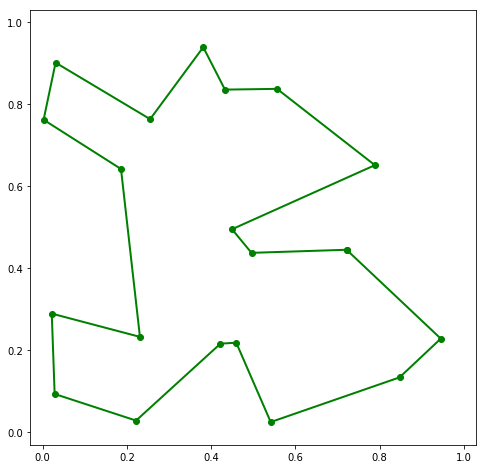

4.373565893287146


In [3]:
tsp = TSP(20)   
sol, score = evolution(tsp, 100, 5, 0.1, 0.8)
tsp.display_solution_param(sol)
print(score)

**Task 2:**

* What is the role of a mutation operator in evolutionary algorithms?
* What are the properties of a good mutation operator?
* What is the role of a crossover operator in evolutionary algorithms?
* What are the properties of a good crossover operator?
* What is the role of a cloning operator in evolutionary algorithms?
* What are the properties of a good genetic representation?
* How can you tell that the population has converged?
* How do the parameters of the evolutionary algorithm affect the speed of its convergence?
* Does the speed of the algorithm's convergence correlate with the quality of the solutions? What is the reason?
* Can a population escape from a local optimum once it has converged?


* What are the strengths of the evolutionary algorithms?
* What are the weaknesses of the evolutionary algorithms?
* What changes would you introduce to the evolutionary algorithms?
* Which problems are evolutionary algorithms best suited for?

Answers:
- Mutation protects against falling into local optimum. Higher mutation probability causes algorithm to behave in more exporatory way.
- Good mutation operator allows algorithm to traverse through local optima, while moving specimen (solution) to its closest neighborhood to in order to avoid complete destruction of the original solution.
- Crossover combines good specimens in order to get new specimen containing something from both parents. The main idea is that fusion of good solutions should produce another good solution.
- Good crossover operator should produce a child similar to both parents. It is important that new specimen will have legal representation.
- Cloning operator can be seen as a special case of crossover where there is only one parent. Creating new specimens using cloning can be reasonable as it allows solution to participate in a next generation.
- Good genetic representation should exclude illegal solutions. Its form shouldn't allow creation of invalid specimens. Good genetic representation should also support simple mutation operator which could change solution to move it to its closest neighborhood.
- The first sight of convergence is observation that after some time a score of the best solution is not rising. Observing that population is full of the same solutions is another sign of convergence.
- Higher likelihood of crossing and higher mutation rate will postpone convergance, but more solutions will be evaluated leading to potentially better solutions. Good genetic representation can greatly reduce time required to achieve convergence, while losing nothing in the terms of the quality of the found solution. Good representation saves time by not allowing for generating solutions that will be invalid.
- Generally algorithm which ends sooner has worse solution. Shorter run time means that less solutions could be evaluated. But as it was mentioned before good representation will allow to find good solutions in shorter time.
- It could happend that some mutation will cause birth of new, superior solution, but it's unlikely.
- Evolutionery algorithms have simple construction. It is enough to implement crossover and mutation operator, selection, evaluation function and desing the form of the solution to achieve fairly good solutions for problems, for which proper algorithm would be too complex.
- Designing parts of evolutionary algorithm can be challenging for some problems. For some problems score function landscape can be distorted so much that it will be only a matter of chance to achieve good solutions.
- Algorithm implemented for this assignment was very static. It would be better if parameters of algorithm could change over time using some heuristics to build some knowledge about score landscape.
- Evolutionary algorithms are best suited for problems with global convexity.

**Task 3:** Implement the QAP (https://en.wikipedia.org/wiki/Quadratic_assignment_problem). Use EA to solve it.

In [4]:
class QAP():
    
    def distance(self, c1, c2):
        loc1, loc2 = self.locations[c1], self.locations[c2]
        return math.sqrt((loc1[0]-loc2[0])**2 + (loc1[1]-loc2[1])**2)
    
    def __init__(self, n, seed=1):
        random.seed(seed)
        self.n = n
        
        self.locations = []
        for i in range(n):
            self.locations.append((random.random(), random.random()))
        
        self.distances = []
        for i in range(n):
            self.distances.append([])
            for j in range(n):
                self.distances[i].append(self.distance(i, j))
                
        self.weights = np.zeros((n,n))
        for e, i in enumerate(range(n)):
            for j in range(e):
                if i!=j:
                    w = random.random()
                    self.weights[i,j] = w
                    self.weights[j,i] = w
                               
    def random_solution(self):
        s = np.random.permutation(range(self.n))
        return s
    
    def evaluate(self, s):
        fit = 0
        for f_1 in range(self.n):
            for f_2 in range(self.n):
                fit += self.weights[f_1, f_2] * self.distances[s[f_1]][s[f_2]]
        return fit
    
    def mutate(self, s):
        sol = s[:]
        i, j = np.random.choice(range(self.n), 2)
        sol[i], sol[j] = sol[j], sol[i]
        return sol
    
    def crossover(self, s1, s2):
        sol1, sol2 = s1[:], s2[:]
        i, j = sorted(np.random.permutation(range(self.n))[:2])
        sol1 = [e for e in s2 if e not in s1[i:j+1]]
        sol1[i:i] = s1[i:j+1]
        sol2 = [e for e in s1 if e not in s2[i:j+1]]
        sol2[i:i] = s2[i:j+1]
        return sol1, sol2

In [5]:
qap = QAP(6)   
sol, score = evolution(qap, 100, 5, 0.1, 0.8)
print("Solution: {}".format(sol))
print("Score: {}".format(score))

Solution: [2, 3, 5, 1, 4, 0]
Score: 6.470006863461916


**Task 4:** Choose one of the problems (TSP or QAP). Assume a constant number of fitness evaluations per each evolutionary run. For a sufficiently big (nontrivial) problem:

a) Assume $N = 200$, $t = 5$. Prepare a heatmap illustrating the influence of values of $p_m$ and $p_c$ on the quality of the solution.

b) Assume $p_m = 0.5$, $p_c = 0.5$. Prepare a heatmap illustrating the influence of values of $N$ and $t$ on the quality of the solution.

Discuss the results. Can we expect to see similar results under different search termination conditions (e.g. a number of iterations with no improvement)? Can we expect to see similar results for different optimization problems?

In [6]:
def run_tsp(n=200, t=5, p_m=0.5, p_c=0.5):
    tsp = TSP(20)   
    sol, score = evolution(problem=tsp, n=100, t=5, p_m=0.2, p_c=0.8)
    return score

In [10]:
import seaborn as sns
sns.set()

def experiment_tsp_n_200_t_5(samples = 10):

    p_m_list = [np.round(e, 2) for e in np.linspace(0, 1, samples)]
    p_c_list = [np.round(e,2) for e in np.linspace(0, 1, samples)]
    n = 200
    t = 5

    scores = np.zeros((samples,samples))
    
    for i, p_m in enumerate(p_m_list):
        for j, p_c in enumerate(p_c_list):
            scores[i, j] = np.mean([run_tsp(p_m=p_m, p_c=p_c) for _ in range(3)])
    
    plt.figure(figsize=(10,10))
    ax = sns.heatmap(scores)
    ax.set(xlabel = "Crossover probability", 
           ylabel="Mutation probability", 
           title="Heatplot of scores for different values for p_m and p_c")
    ax.set_xticklabels(p_c_list, rotation=70)
    ax.set_yticklabels(p_m_list, rotation=0)
    
def experiment_tsp_n_pm_05_pc_05(samples = 7):

    p_m = 0.5
    p_c = 0.5
    n_list = np.linspace(30, 30*samples, samples)
    t_list = list(range(3, 3+samples))
    
    scores = np.zeros((samples,samples))
    
    for i, n in enumerate(n_list):
        for j, t in enumerate(t_list):
            scores[i, j] = np.mean([run_tsp(n=n, t=t) for _ in range(3)])
            
    plt.figure(figsize=(10,10))
    ax = sns.heatmap(scores)
    ax.set(xlabel = "Tournament size", 
           ylabel="Population size", 
           title="Heatplot of scores for different values for N and t")
    ax.set_xticklabels(t_list, rotation=70)
    ax.set_yticklabels(n_list, rotation=0)

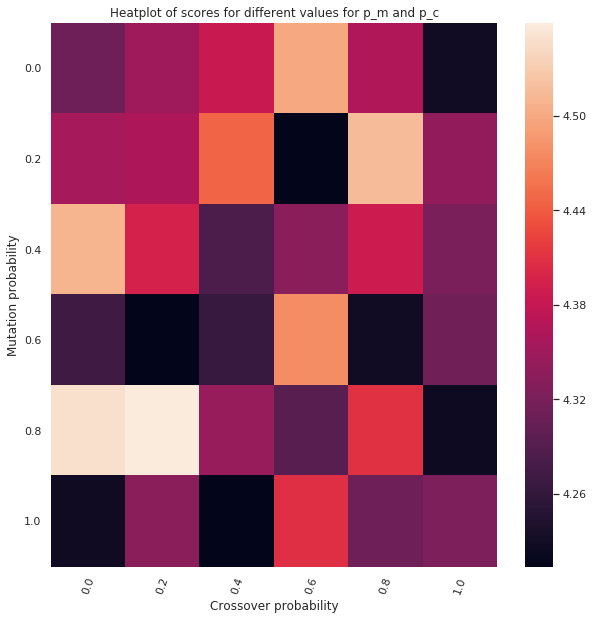

In [8]:
experiment_tsp_n_200_t_5(6)

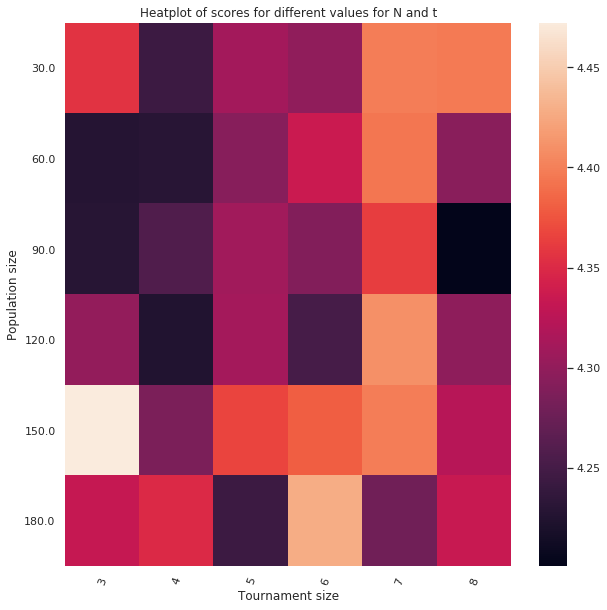

In [11]:
experiment_tsp_n_pm_05_pc_05(6)

Experiments were conducted using grid search technique. First grid search contained lists of six equaly spaced values from 0 to 1 for both probability of mutation and probability of crossover, which are expected as parameters for our function executing evolutionary algorithm.
Second grid search contained lists of values for population size (six consecutive magnitudes of 30) and tournament size (values from 3 to 8).
Each subexperiment has been runned 3 times and averaged before placed in score matrix.

Heatplots for those two experiments were prepared. Darker fields presents achieved better results, while brighter ones symbolizes worse (but still good) results.

Heatplot of scores for different probabilities of mutation and crossover doesn't seem to have strong correlation between those two parameters. Still one could notice that algorithm performs better for higher probability of crossover, while it seems that mutation probability slightly below 0.6 usually finds better solutions.

Heatplot of population size compared to tournament size has strong pattern, which suggests that lover values for both population size and tournament size tends to achieve better results. But actually the best soulution in this grid search was found for tournament equal to 8 and population size qual to 90